In [100]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv('Students.csv')

In [3]:
data

,Age,Gender,Height,Weight,Math Score,Science Score,Overall Performance
0,18.0,Female,169.0,56,63.0,70,Excellent
1,21.0,Male,183.0,57,57.0,57,Poor
2,21.0,Male,182.0,68,66.0,53,Good
3,57.0,Female,186.0,78,72.0,71,Poor
4,27.0,Male,156.0,93,65.0,-10,Excellent
...,...,...,...,...,...,...,...
100,NaN,Female,189.0,63,55.0,64,Poor
101,18.0,Male,161.0,56,83.0,87,Excellent
102,54.0,female,172.0,88,NaN,77,Excellent
103,52.0,Male,180.0,89,80.0,86,Poor


In [ ]:
1. Null values - replace
2. Duplicated
2. Text error
3. Outlier
4. Negative value
5. Scaling
6. Encoding

In [4]:
data.shape

(105, 7)

In [6]:
data.describe()

,Age,Height,Weight,Math Score,Science Score
count,99.000000,100.00000,105.000000,101.000000,105.000000
mean,46.646465,179.59000,80.828571,74.000000,75.028571
std,96.714741,83.71019,63.945959,14.606848,20.916711
min,0.000000,150.00000,-90.000000,50.000000,-10.000000
25%,26.500000,161.00000,63.000000,60.000000,63.000000
50%,37.000000,172.50000,74.000000,74.000000,76.000000
75%,52.000000,182.25000,86.000000,85.000000,87.000000
max,989.000000,1000.00000,512.000000,99.000000,210.000000


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  99 non-null     float64
 1   Gender               102 non-null    object 
 2   Height               100 non-null    float64
 3   Weight               105 non-null    int64  
 4   Math Score           101 non-null    float64
 5   Science Score        105 non-null    int64  
 6   Overall Performance  105 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 5.9+ KB


In [9]:
data.isna().sum()

Age                    6
Gender                 3
Height                 5
Weight                 0
Math Score             4
Science Score          0
Overall Performance    0
dtype: int64

In [10]:
data.duplicated().sum()

5

In [12]:
data = data.drop_duplicates()

In [13]:
data.shape

(100, 7)

In [14]:
data.isna().sum()

Age                    5
Gender                 3
Height                 5
Weight                 0
Math Score             3
Science Score          0
Overall Performance    0
dtype: int64

In [16]:
data['Age'].mean()

47.305263157894736

In [17]:
data['Age'].median()

37.0

<AxesSubplot:>

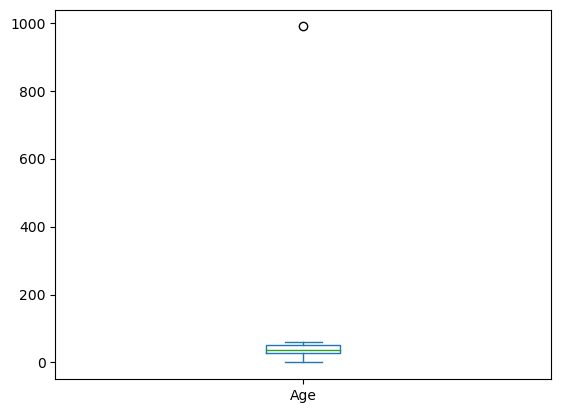

In [19]:
data['Age'].plot(kind= 'box')

In [21]:
data['Age'] = data['Age'].fillna(data['Age'].median())

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_23857/32821270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].fillna(data['Age'].median())


In [22]:
data['Age'].isna().sum()

0

In [23]:
#Detecting outlier with z-score
outliers=[]
def detect_outlier(insurance):
    
    threshold=3
    mean_1 = np.mean(insurance)
    std_1 = np.std(insurance)
    
    
    for y in insurance:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers




In [31]:
data['Age'] = data['Age'].astype('int')

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_23857/3542571116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].astype('int')


In [34]:
data.select_dtypes(include=np.number).apply(detect_outlier)


,Age,Height,Weight,Math Score,Science Score
0,989.0,989.0,989.0,989.0,989.0
1,1000.0,1000.0,1000.0,1000.0,1000.0
2,-90.0,-90.0,-90.0,-90.0,-90.0
3,512.0,512.0,512.0,512.0,512.0
4,-10.0,-10.0,-10.0,-10.0,-10.0
5,210.0,210.0,210.0,210.0,210.0
6,989.0,989.0,989.0,989.0,989.0
7,989.0,989.0,989.0,989.0,989.0
8,1000.0,1000.0,1000.0,1000.0,1000.0
9,-90.0,-90.0,-90.0,-90.0,-90.0


In [35]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Age
Outliers =  59    989
Name: Age, dtype: int64
Height
Outliers =  5    1000.0
Name: Height, dtype: float64
Weight
Outliers =  91    -90
99    512
Name: Weight, dtype: int64
Math Score
Outliers =  Series([], Name: Math Score, dtype: float64)


In [43]:
#Removed the age outlier
data = data[~(data['Age']>100)]

In [44]:
data['Age'].mean()

37.27272727272727

In [45]:
data['Age'].median()

37.0

<AxesSubplot:>

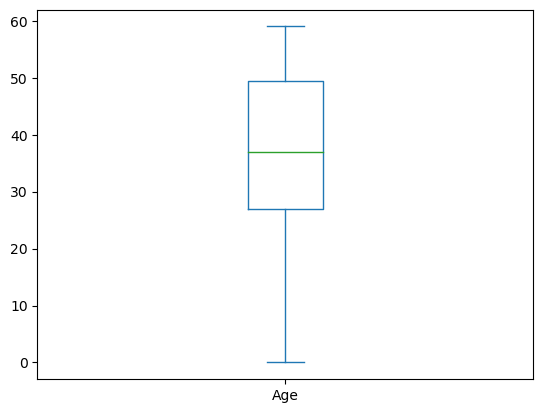

In [47]:
data['Age'].plot(kind = 'box')

In [48]:
data['Gender']

0     Female
1       Male
2       Male
3     Female
4       Male
       ...  
95    Female
96      Male
97    female
98      Male
99      Male
Name: Gender, Length: 99, dtype: object

In [49]:
data['Gender'].isna().sum()

3

In [50]:
data['Gender'].unique()

array(['Female', 'Male', nan, 'gents', 'femal', 'mal', 'girl', 'boy',
       'male', 'ladies', 'women', 'female'], dtype=object)

In [54]:
data['Gender'].replace({'gents':'Male','mal':'Male','boy':'Male','male':'Male'}, inplace = True)
data['Gender'].replace({'femal':'Female','girl':'Female','ladies':'Female','women':'Female', 'female':'Female'}, inplace = True)



In [55]:
data['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [56]:
data['Gender'].value_counts()

Male      55
Female    41
Name: Gender, dtype: int64

In [58]:
data['Gender'].mode()[0]

'Male'

In [60]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)

In [61]:
data['Gender'].isna().sum()

0

In [63]:
data[['Height','Weight','Math Score','Science Score']].isna().sum()

Height           5
Weight           0
Math Score       3
Science Score    0
dtype: int64

In [65]:
data.shape

(99, 7)

In [64]:
data.dropna(subset = ['Height','Weight','Math Score','Science Score'])

,Age,Gender,Height,Weight,Math Score,Science Score,Overall Performance
0,18,Female,169.0,56,63.0,70,Excellent
1,21,Male,183.0,57,57.0,57,Poor
2,21,Male,182.0,68,66.0,53,Good
3,57,Female,186.0,78,72.0,71,Poor
4,27,Male,156.0,93,65.0,-10,Excellent
...,...,...,...,...,...,...,...
94,23,Female,189.0,94,59.0,78,Excellent
95,37,Female,189.0,63,55.0,64,Poor
96,18,Male,161.0,56,83.0,87,Excellent
98,52,Male,180.0,89,80.0,86,Poor


In [66]:
data.shape

(99, 7)

In [67]:
data.dropna(subset = ['Height','Weight','Math Score','Science Score'], inplace = True)

In [68]:
data.shape

(91, 7)

In [69]:
data.isna().sum()

Age                    0
Gender                 0
Height                 0
Weight                 0
Math Score             0
Science Score          0
Overall Performance    0
dtype: int64

In [73]:
data = data[data['Weight']>0]

In [74]:
data = data[data['Math Score']>0]

In [75]:
data = data[data['Science Score']>0]

In [76]:
data.shape

(89, 7)

In [77]:
data

,Age,Gender,Height,Weight,Math Score,Science Score,Overall Performance
0,18,Female,169.0,56,63.0,70,Excellent
1,21,Male,183.0,57,57.0,57,Poor
2,21,Male,182.0,68,66.0,53,Good
3,57,Female,186.0,78,72.0,71,Poor
5,37,Female,1000.0,69,75.0,94,Poor
...,...,...,...,...,...,...,...
94,23,Female,189.0,94,59.0,78,Excellent
95,37,Female,189.0,63,55.0,64,Poor
96,18,Male,161.0,56,83.0,87,Excellent
98,52,Male,180.0,89,80.0,86,Poor


In [78]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Age
Outliers =  Series([], Name: Age, dtype: int64)
Height
Outliers =  5    1000.0
Name: Height, dtype: float64
Weight
Outliers =  99    512
Name: Weight, dtype: int64
Math Score
Outliers =  Series([], Name: Math Score, dtype: float64)


In [81]:
data = data[(data['Height']<200)]

In [82]:
data = data[(data['Height']>100)]

In [83]:
data.shape

(88, 7)

In [84]:
data = data[(data['Weight']<120)]

In [85]:
data.shape

(87, 7)

In [86]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Age
Outliers =  Series([], Name: Age, dtype: int64)
Height
Outliers =  Series([], Name: Height, dtype: float64)
Weight
Outliers =  Series([], Name: Weight, dtype: int64)
Math Score
Outliers =  Series([], Name: Math Score, dtype: float64)


In [87]:
data

,Age,Gender,Height,Weight,Math Score,Science Score,Overall Performance
0,18,Female,169.0,56,63.0,70,Excellent
1,21,Male,183.0,57,57.0,57,Poor
2,21,Male,182.0,68,66.0,53,Good
3,57,Female,186.0,78,72.0,71,Poor
6,39,Female,181.0,99,58.0,53,Excellent
...,...,...,...,...,...,...,...
93,49,Male,171.0,59,95.0,52,Poor
94,23,Female,189.0,94,59.0,78,Excellent
95,37,Female,189.0,63,55.0,64,Poor
96,18,Male,161.0,56,83.0,87,Excellent


In [89]:
data_num = data.select_dtypes(include = np.number)

In [90]:
data_num

,Age,Height,Weight,Math Score,Science Score
0,18,169.0,56,63.0,70
1,21,183.0,57,57.0,57
2,21,182.0,68,66.0,53
3,57,186.0,78,72.0,71
6,39,181.0,99,58.0,53
...,...,...,...,...,...
93,49,171.0,59,95.0,52
94,23,189.0,94,59.0,78
95,37,189.0,63,55.0,64
96,18,161.0,56,83.0,87


In [101]:
scaling = MinMaxScaler()

In [106]:
# sklearn onehot
pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

,Age,Height,Weight,Math Score,Science Score
0,0.000000,0.487179,0.122449,0.265306,0.12500
1,0.073171,0.846154,0.142857,0.142857,0.04375
2,0.073171,0.820513,0.367347,0.326531,0.01875
3,0.951220,0.923077,0.571429,0.448980,0.13125
4,0.512195,0.794872,1.000000,0.163265,0.01875
...,...,...,...,...,...
82,0.756098,0.538462,0.183673,0.918367,0.01250
83,0.121951,1.000000,0.897959,0.183673,0.17500
84,0.463415,1.000000,0.265306,0.102041,0.08750
85,0.000000,0.282051,0.122449,0.673469,0.23125


In [108]:
scaling = StandardScaler()
data_scale = pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

In [109]:
data_scale

,Age,Height,Weight,Math Score,Science Score
0,-1.491741,-0.228699,-1.316705,-0.757874,-0.277033
1,-1.258181,0.951622,-1.243834,-1.166985,-0.917779
2,-1.258181,0.867313,-0.442252,-0.553318,-1.114932
3,1.544538,1.204548,0.286459,-0.144208,-0.227745
4,0.143178,0.783005,1.816751,-1.098799,-1.114932
...,...,...,...,...,...
82,0.921711,-0.060082,-1.098092,1.424050,-1.164220
83,-1.102474,1.457474,1.452396,-1.030614,0.117272
84,-0.012528,1.457474,-0.806607,-1.303355,-0.572762
85,-1.491741,-0.903169,-1.316705,0.605829,0.560865


In [110]:
data_cat = data.select_dtypes(exclude = np.number)

In [111]:
data_cat

,Gender,Overall Performance
0,Female,Excellent
1,Male,Poor
2,Male,Good
3,Female,Poor
6,Female,Excellent
...,...,...
93,Male,Poor
94,Female,Excellent
95,Female,Poor
96,Male,Excellent


In [112]:
data_cat['Gender']

0     Female
1       Male
2       Male
3     Female
6     Female
       ...  
93      Male
94    Female
95    Female
96      Male
98      Male
Name: Gender, Length: 87, dtype: object

In [114]:
data_gender_cat = pd.get_dummies(data_cat['Gender'])

In [115]:
data['Overall Performance']

0     Excellent
1          Poor
2          Good
3          Poor
6     Excellent
        ...    
93         Poor
94    Excellent
95         Poor
96    Excellent
98         Poor
Name: Overall Performance, Length: 87, dtype: object

In [117]:
data['Overall Performance'].replace({'Poor':0, 'Good':1, 'Excellent':2}, inplace = True)

In [118]:
data['Overall Performance']

0     2
1     0
2     1
3     0
6     2
     ..
93    0
94    2
95    0
96    2
98    0
Name: Overall Performance, Length: 87, dtype: int64

In [132]:
data['Overall Performance']

0     2
1     0
2     1
3     0
6     2
     ..
93    0
94    2
95    0
96    2
98    0
Name: Overall Performance, Length: 87, dtype: int64

In [133]:
data['Overall Performance'].reset_index()

,index,Overall Performance
0,0,2
1,1,0
2,2,1
3,3,0
4,6,2
...,...,...
82,93,0
83,94,2
84,95,0
85,96,2


In [134]:
data['Overall Performance'].reset_index().drop(columns = 'index')

,Overall Performance
0,2
1,0
2,1
3,0
4,2
...,...
82,0
83,2
84,0
85,2


In [127]:
data_scale = data_scale.reset_index().drop(columns = 'index')
data_gender_cat = data_gender_cat.reset_index().drop(columns = 'index')
data_per_cat = data['Overall Performance'].reset_index().drop(columns = 'index')


In [131]:
pd.concat([data_scale, data_gender_cat, data_per_cat], axis = 1)

,Age,Height,Weight,Math Score,Science Score,Female,Male,Overall Performance
0,-1.491741,-0.228699,-1.316705,-0.757874,-0.277033,1,0,2
1,-1.258181,0.951622,-1.243834,-1.166985,-0.917779,0,1,0
2,-1.258181,0.867313,-0.442252,-0.553318,-1.114932,0,1,1
3,1.544538,1.204548,0.286459,-0.144208,-0.227745,1,0,0
4,0.143178,0.783005,1.816751,-1.098799,-1.114932,1,0,2
...,...,...,...,...,...,...,...,...
82,0.921711,-0.060082,-1.098092,1.424050,-1.164220,0,1,0
83,-1.102474,1.457474,1.452396,-1.030614,0.117272,1,0,2
84,-0.012528,1.457474,-0.806607,-1.303355,-0.572762,1,0,0
85,-1.491741,-0.903169,-1.316705,0.605829,0.560865,0,1,2


In [141]:
data_scale.index

RangeIndex(start=0, stop=87, step=1)

In [142]:
data_gender_cat.index

RangeIndex(start=0, stop=87, step=1)